In [2]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = []
file_path = "renttherunway_final_data.json.gz"

with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding line: {e}")

df = pd.DataFrame(data)
df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27,"September 26, 2016"


## Data Cleaning

In [3]:
### Data Overview
overview = df.info()
overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


In [4]:
### Descriptive Statistics
descriptive_stats = df.describe(include="all")
descriptive_stats

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
count,192544,192544,174133,192544,162562,192462,192534,192544,177907,192544,192544,191867,192544.000000,191584,192544
unique,3,105571,106,5850,190,5,9,191031,7,154740,68,24,NaN,89,2274
top,fit,691468,34b,126335,130lbs,10,wedding,.,hourglass,Stylist Review,dress,"5' 4""",NaN,31,"June 15, 2016"
freq,142058,436,27285,2241,14370,124537,57784,63,55349,977,92884,28012,NaN,14522,844
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.245175,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.494877,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,NaN,NaN


## Convert Height to Float

In [22]:
df = pd.DataFrame(data)

df['height'].isna().sum()
# small null values for height; we can just drop
df = df.dropna(subset=['height'])
df['height'].isna().sum()

def height_to_float(height):
    feet, inches = height.split("' ")
    inches = inches.replace("\"", "")
    return float(feet) * 12 + float(inches)

# small null values for weight; we can just drop
df['weight'].isna().sum()
df['height (in)'] = df['height'].apply(height_to_float)

def clean_weight(value):
    if pd.isna(value):
        return np.nan
    return float(value.replace('lbs', ''))
df['weight'] = df['weight'].apply(clean_weight)

mean_weights_by_height = df.groupby('height (in)')['weight'].mean()
df['weight'] = df.apply(
    lambda row: mean_weights_by_height[row['height (in)']] if pd.isna(row['weight']) else row['weight'],
    axis=1
)
df = df.dropna(subset=['rating', 'rented for', 'body type', 'age'])

df['age'] = df['age'].astype(int)

In [23]:
df[['fit', 'user_id', 'item_id', 'weight', 'rating', 'rented for', 'body type', 'category', 'height (in)', 'size', 'age']].head()

,fit,user_id,item_id,weight,rating,rented for,body type,category,height (in),size,age
0,fit,420272,2260466,137.0,10,vacation,hourglass,romper,68.0,14,28
1,fit,273551,153475,132.0,10,other,straight & narrow,gown,66.0,12,36
3,fit,909926,126335,135.0,8,formal affair,pear,dress,65.0,8,34
4,fit,151944,616682,145.0,10,wedding,athletic,gown,69.0,12,27
5,fit,734848,364092,138.0,8,date,athletic,dress,68.0,8,45


## Data Visualization

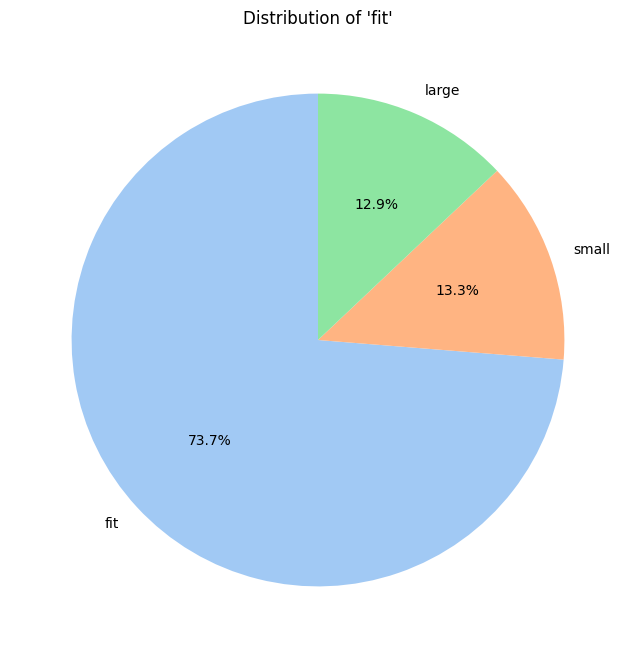

In [ ]:
fit_counts = df["fit"].value_counts()
plt.figure(figsize=(8, 8))
fit_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribution of 'fit'")
plt.ylabel("")
plt.show()

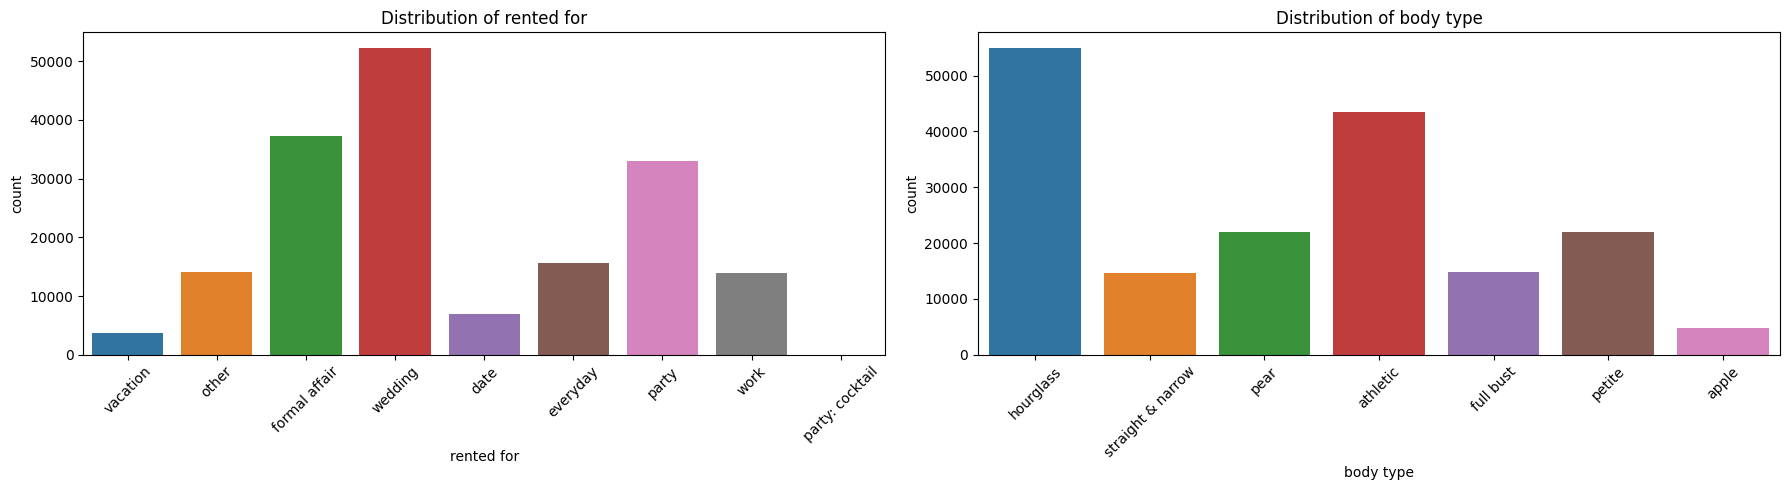

In [25]:
categorical_columns = ["rented for", "body type"]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis="x", rotation=45)
plt.tight_layout()

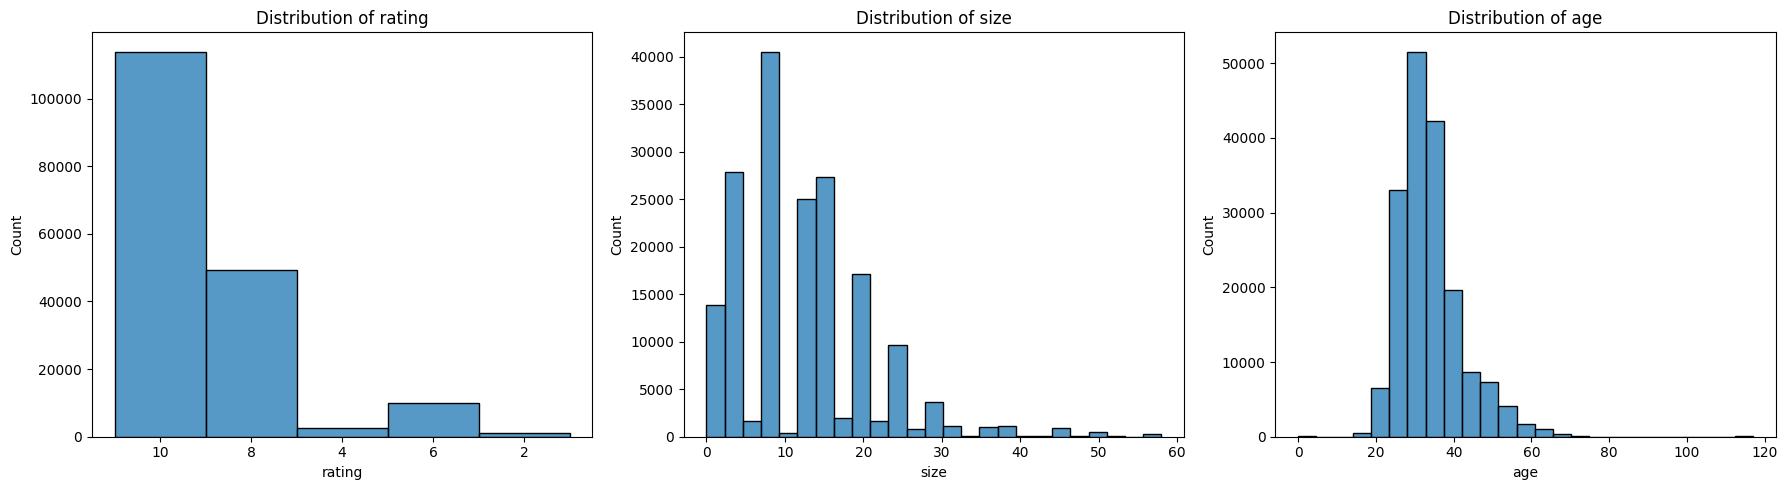

In [32]:
numeric_columns = ["rating", "size", "age"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=25, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()